In [211]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot  as plt
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
import pickle
import joblib


In [212]:
data = pd.read_csv("C:/Users\plaoz\Desktop/veri bilim\datasets/bank-additional.csv", delimiter= ";", quotechar= '"')

In [213]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [214]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [215]:
data.shape

(4119, 21)

In [216]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

# Preprocessing Part

In [218]:
df_encoded = pd.get_dummies(data, drop_first = True)

scaler = StandardScaler()
numerical_col = data.select_dtypes(include=["int64","float64"]).columns
df_encoded[numerical_col] = scaler.fit_transform(df_encoded[numerical_col])

In [232]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [219]:
df_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,-0.980752,0.903952,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,...,False,False,False,False,False,False,False,True,False,False
1,-0.107991,0.350300,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,...,False,False,False,False,False,False,False,True,False,False
2,-1.465619,-0.116966,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,...,False,False,False,False,False,False,True,True,False,False
3,-0.204965,-0.941553,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,...,False,False,False,False,False,False,False,True,False,False
4,0.667795,-0.780563,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,...,True,False,False,True,False,False,False,True,False,False


In [220]:
df_encoded.shape

(4119, 54)

In [221]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   float64
 1   duration                       4119 non-null   float64
 2   campaign                       4119 non-null   float64
 3   pdays                          4119 non-null   float64
 4   previous                       4119 non-null   float64
 5   emp.var.rate                   4119 non-null   float64
 6   cons.price.idx                 4119 non-null   float64
 7   cons.conf.idx                  4119 non-null   float64
 8   euribor3m                      4119 non-null   float64
 9   nr.employed                    4119 non-null   float64
 10  job_blue-collar                4119 non-null   bool   
 11  job_entrepreneur               4119 non-null   bool   
 12  job_housemaid                  4119 non-null   b

In [222]:
df_encoded["y_yes"].value_counts()

y_yes
False    3668
True      451
Name: count, dtype: int64

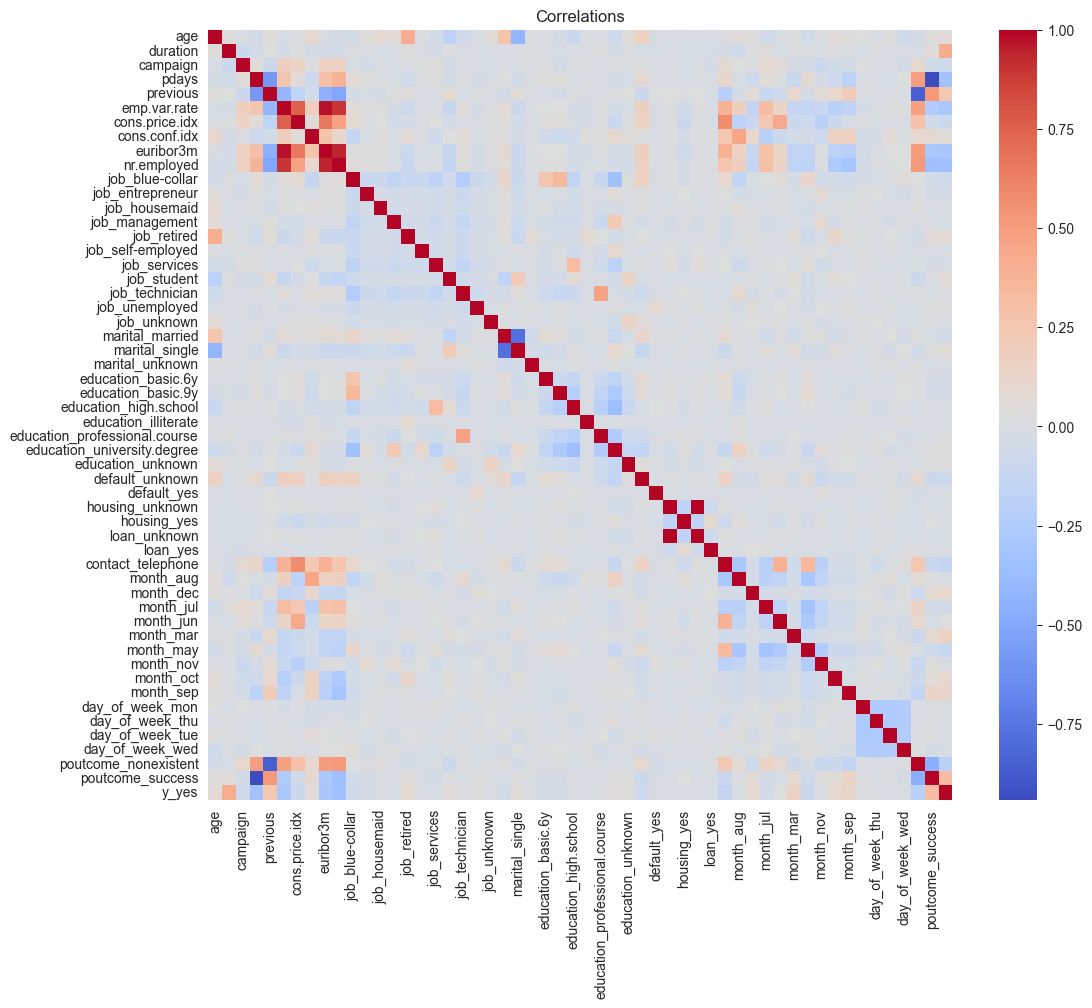

In [223]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize= (12,10))
sns.heatmap(correlation_matrix, annot = False, fmt = ".2f", cmap = "coolwarm")
plt.title("Correlations")
plt.show()

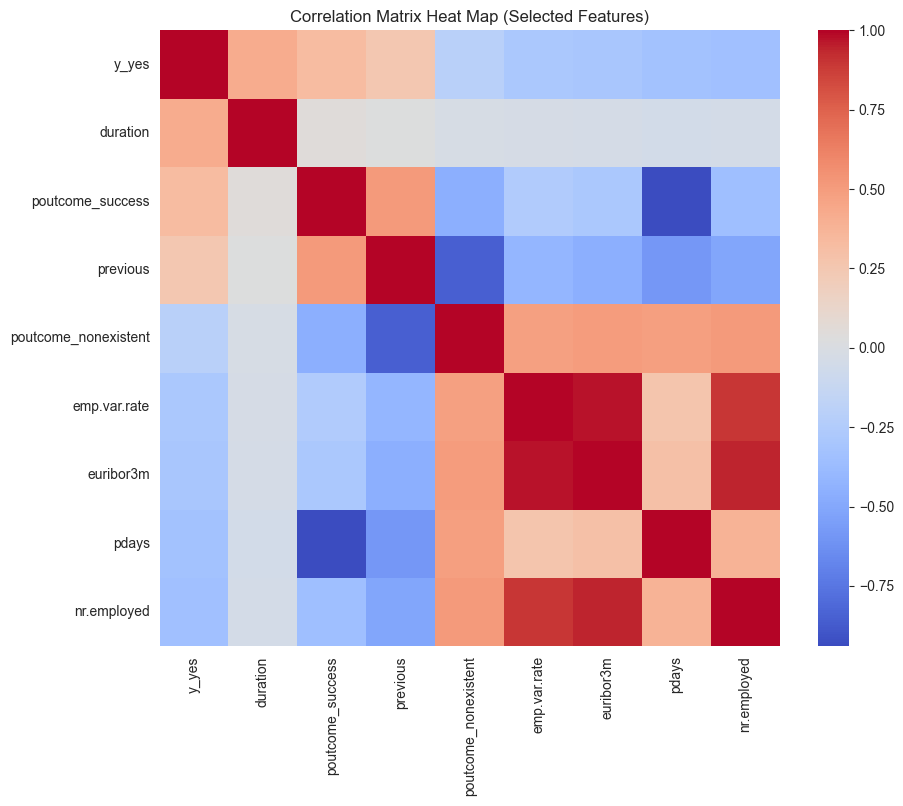

In [224]:
cor_mat = df_encoded.corr()
cor_with_target = cor_mat["y_yes"].sort_values(ascending=False)

threshold = 0.2

selected_features = cor_with_target[abs(cor_with_target) > threshold].index

selected_corr_matrix = df_encoded[selected_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(selected_corr_matrix, annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heat Map (Selected Features)')
plt.show()

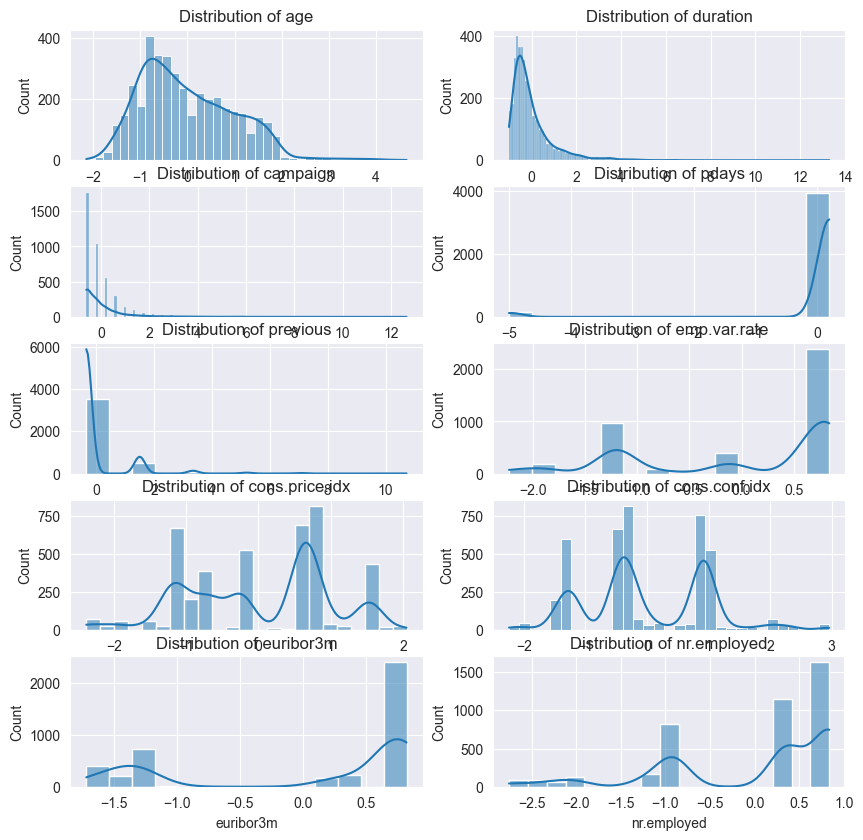

In [225]:
fig,ax = plt.subplots(len(numerical_cols), 2, figsize = (10,20))
axes = ax.flatten()  # Flatten the axes array for easy iteration

# Plot histograms with KDE
for ax, col in zip(axes, numerical_cols):
    sns.histplot(df_encoded[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

for ax in axes[len(numerical_cols):]:
    fig.delaxes(ax)

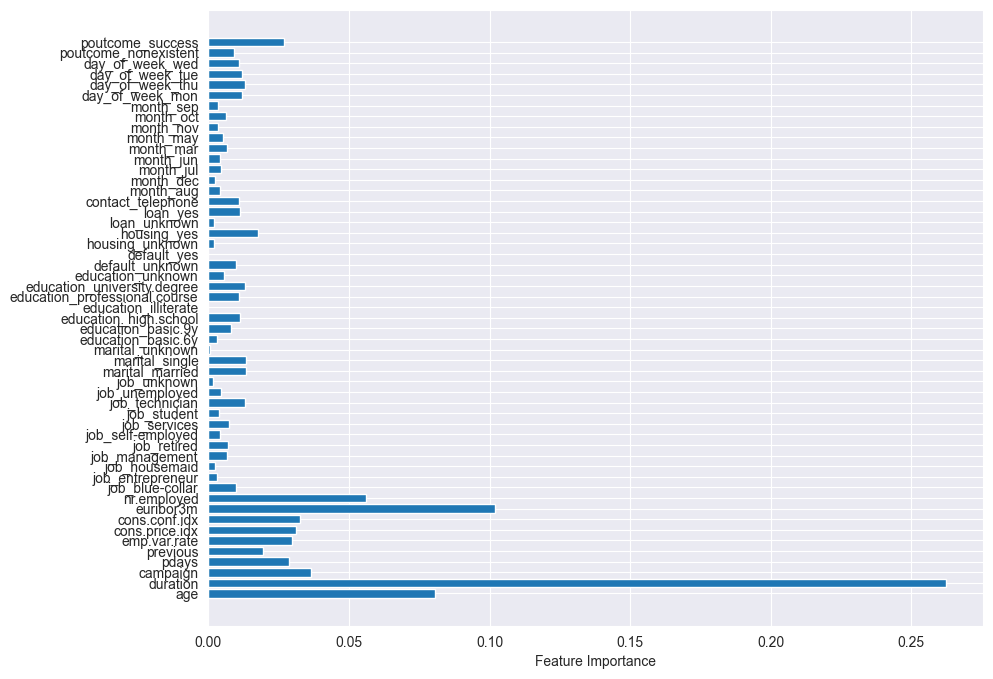

In [226]:
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

# We try to decide which of the features are important
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

# Plot our importances
plt.figure(figsize=(10, 8))
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.show()

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=53)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [231]:
X_train.shape

(3295, 53)

In [228]:
y_train_resampled.value_counts()

y_yes
False    2936
True     2936
Name: count, dtype: int64

In [229]:
# Define classifiers
classifiers = {
    'logistic_regression': LogisticRegression(max_iter=1000),  # Increased max_iter
    'random_forest': RandomForestClassifier(),
    'neural_network': MLPClassifier(max_iter=1000)  # Increased max_iter
}

# Define pipeline
pipeline = Pipeline([
    ('classifier', LogisticRegression())  # Placeholder
])

# Define parameter grid for each classifier
param_grid = [
    {
        'classifier': [LogisticRegression(max_iter=1000)],  # Ensure max_iter is set here as well
        'classifier__C': [0.1, 1, 10]  # Specify parameters for logistic regression
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 200, 300]  # Specify parameters for random forest
    },
    {
        'classifier': [MLPClassifier(max_iter=1000)],  # Ensure max_iter is set here as well
        'classifier__hidden_layer_sizes': [(50,), (100,), (200,)]  # Specify parameters for neural network
    }
]

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and best score for the entire pipeline
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate best model on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_pred))

Best Parameters: {'classifier': LogisticRegression(max_iter=1000), 'classifier__C': 0.1}
Best Score: 0.9171471927162367
Test Set Performance:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95       732
        True       0.63      0.42      0.51        92

    accuracy                           0.91       824
   macro avg       0.78      0.70      0.73       824
weighted avg       0.90      0.91      0.90       824


In [230]:
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)